In [1]:
import numpy as np
import scipy
from bpemb import BPEmb
import matplotlib.pyplot as plt
from document_adaptation import DocumentsAdaptation, User, document_model
import json
import spacy

embedder = BPEmb(lang="eng", dim=200, vs = 200000)

[nltk_data] Downloading package punkt to /home/mario/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = "data/test.json"

with open(data, 'r') as f:
    json_query = json.load(f)

In [9]:
user = User(json_query["userProfile"])
documents =  list(map(lambda x: document_model.DocumentModel(x, user), json_query['results']))
documents = list(filter(lambda x: bool(x.plain_text), documents))
sentences = []
for d in documents:
    for x in d.textRank():
        sentences.append(x)
sentences = [s for s in sentences if len(s.split())> 10]
keyword = user.tastes

In [10]:
from rake_nltk import Rake
def rake(sentence):
    # https://pypi.org/project/rake-nltk/
    r = Rake()
    r.extract_keywords_from_text(sentence)
    salient_sentences = r.get_ranked_phrases()
    return salient_sentences

In [11]:
sentence_embedded = []
for s in sentences:
    sentence_embedded.append(np.concatenate([embedder.embed(x) for x in rake(s)]))
        
keyword_embeddings = [embedder.embed(k) for k in keyword]

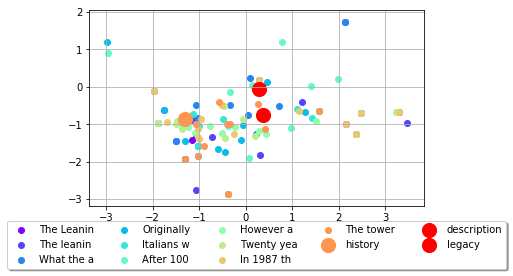

In [12]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm
pca = PCA(n_components=2)
pca.fit(np.concatenate(sentence_embedded))
colors = cm.rainbow(np.linspace(0, 0.8, len(sentence_embedded[:10])))
fig, ax = plt.subplots()
for s, c, t in zip(sentence_embedded[:10], colors, sentences[:10]):
    mypca = pca.transform(s)
    ax.scatter(mypca[:,0], mypca[:,1],  color=c,label =t[:10])
colors = cm.rainbow(np.linspace(0.8, 10, len(keyword_embeddings)))
for k, t, c in zip(keyword_embeddings, keyword, colors):
    mypca = pca.transform(k)
    ax.scatter(mypca[:,0], mypca[:,1], s=200,  color=c, label = t)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.grid(True)
plt.show()

In [66]:
def distance_keyword(sentences, sentences_embedding, keyword_embedding):
    min = 10
    result = []
    for s, emb in zip(sentences, sentences_embedding):
        distance = np.mean(scipy.spatial.distance.cdist(emb, keyword_embedding, "cosine"))
        result.append([distance, s, emb])
    result.sort(key=lambda x: x[0])
    return result

the keyword is: history


Up next The Great Depression: Crash Course US History #33 - Duration: 14:27.
['crash course us history', 'great depression', 'next', 'duration', '33', '27', '14']


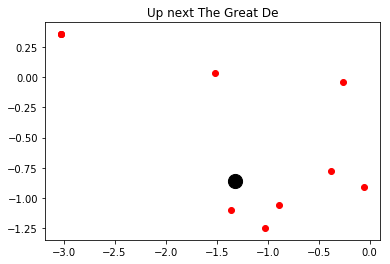

Leaning Tower of Pisa - Student Encyclopedia (Ages 11 and up) Article History Article Contributors Load Next Article
['article history article contributors load next article', 'student encyclopedia', 'leaning tower', 'ages 11', 'pisa']


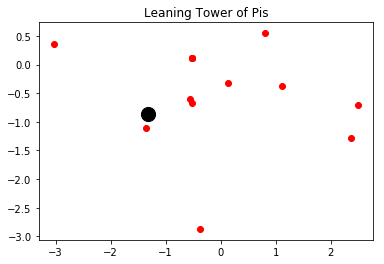

CrashCourse 96,440 views 12:22 Christianity from Judaism to Constantine: Crash Course World History #11 - Duration: 11:37.
['crash course world history', '440 views 12', 'crashcourse 96', '22 christianity', 'judaism', 'duration', 'constantine', '37', '11']


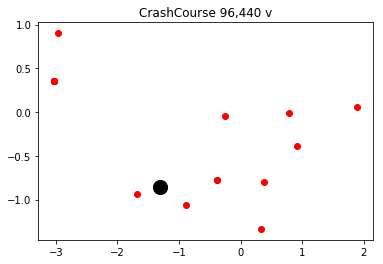

Italy is a place you could spend months in and still not see all of the historical sites.
['could spend months', 'historical sites', 'still', 'see', 'place', 'italy']


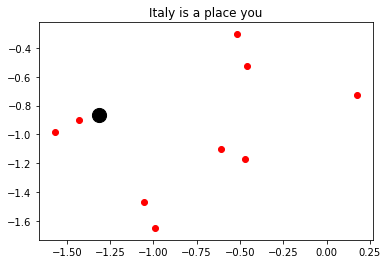

After Skool 1,326,890 views 29:15 Money & Debt: Crash Course World History 202 - Duration: 14:04.
['crash course world history 202', '890 views 29', 'skool 1', '15 money', 'duration', 'debt', '326', '14', '04']


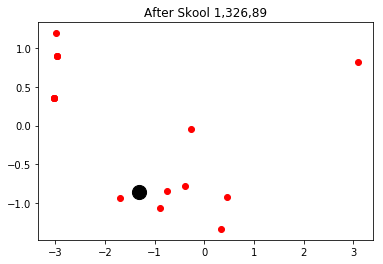

CGP Grey 6,125,515 views 5:35 Air Travel and The Space Race: Crash Course History of Science #37 - Duration: 12:22.
['crash course history', 'cgp grey 6', '515 views 5', '35 air travel', 'space race', 'science', 'duration', '37', '22', '125', '12']


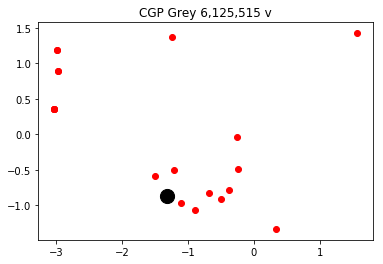

| Source Our Second VisitOur second visit to Pisa was much more recent, and this time we came from Lucca.
['second visitour second visit', 'time', 'source', 'recent', 'pisa', 'much', 'lucca', 'came']


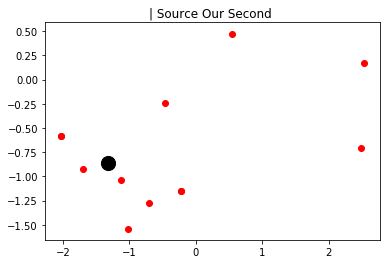

CrashCourse 2,069,355 views 14:04 Islam, the Quran, and the Five Pillars All Without a Flamewar: Crash Course World History #13 - Duration: 12:53.
['crash course world history', '355 views 14', 'five pillars', 'crashcourse 2', '04 islam', 'without', 'quran', 'flamewar', 'duration', '53', '13', '12', '069']


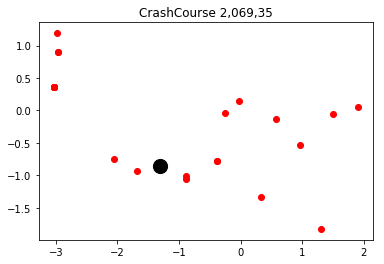

It was built on the site of Watkin's Tower, covering its foundations, and opened in 1923, and later became the home ground of the England national football team.
['england national football team', 'later became', 'home ground', 'watkin', 'tower', 'site', 'opened', 'foundations', 'covering', 'built', '1923']


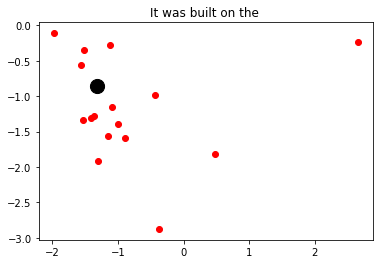

Descriptive Illustrated Catalogue of the Sixty-Eight Competitive Designs for the Great Tower for London.
['eight competitive designs', 'descriptive illustrated catalogue', 'great tower', 'sixty', 'london']


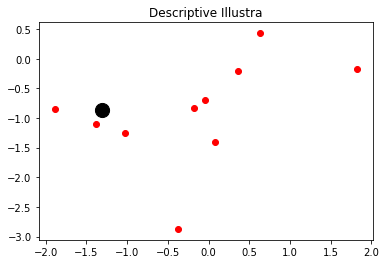

Contents 1 Architect 2 Construction 3 History following construction 4 Surviving earthquakes 5 Guinness World Records 6 Technical information 7 Gallery 8 See also 9 References 10 External links Architect There has been controversy about the real identity of the architect of the Leaning Tower of Pisa.
['contents 1 architect 2 construction 3 history following construction 4 surviving earthquakes 5 guinness world records 6 technical information 7 gallery 8 see also 9 references 10 external links architect', 'architect', 'real identity', 'leaning tower', 'pisa', 'controversy']


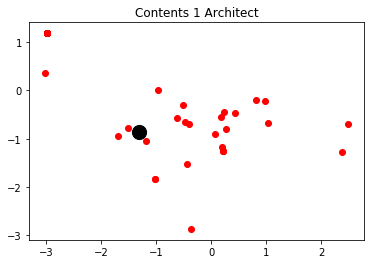

Almost thirty years later, in 1260, William of Innsbruck added the sixth and seventh stories to the Tower of Pisa.
['almost thirty years later', 'seventh stories', 'innsbruck added', 'william', 'tower', 'sixth', 'pisa', '1260']


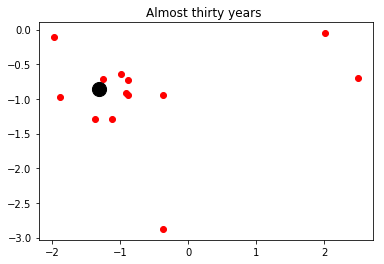

Contents 1 Names 2 History 2.1 Design and construction 2.2 Opening and demolition 3 Legacy 4 References 5 External links Names[edit] Numerous names and nicknames were given to the tower during its planning, construction and legacy.
['demolition 3 legacy 4 references 5 external links names', 'contents 1 names 2 history 2', 'numerous names', '2 opening', '1 design', 'construction 2', 'legacy', 'construction', 'tower', 'planning', 'nicknames', 'given', 'edit']


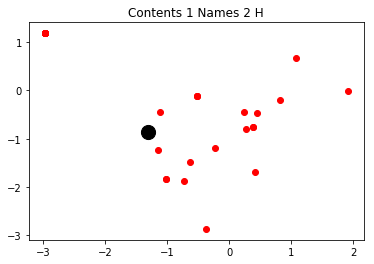

To show the world just how important the city was, the people of Pisa decided to build a great cathedral complex, the Field of Miracles.
['great cathedral complex', 'pisa decided', 'world', 'show', 'people', 'miracles', 'important', 'field', 'city', 'build']


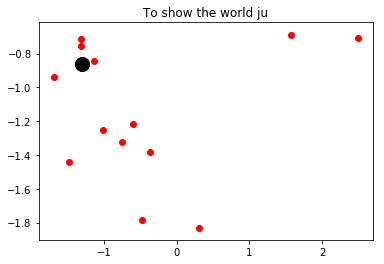

The Leaning Tower of Pisa became a UNESCO World Heritage Site in 1987.
['unesco world heritage site', 'pisa became', 'leaning tower', '1987']


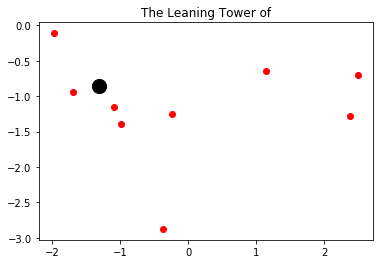

In [72]:
sorted_results = distance_keyword(sentences, sentence_embedded, keyword_embeddings[0])
printed = []
print("the keyword is: " + keyword[0] + "\n\n")
i = 0
count = 0
while count < 15:
    if not sorted_results[i][1] in printed:
        res = sorted_results[i]
        fig1, ax1 = plt.subplots()
        #ax1.set(xlim=(-3, 3), ylim=(-3, 3))
        ax1.set_title(res[1][:20])
        print(res[1])
        print(rake(res[1]))
        mypca = pca.transform(res[2])
        ax1.scatter(mypca[:,0], mypca[:,1],  color="red")
        ax1.scatter(pca.transform(keyword_embeddings[0])[:, 0], pca.transform(keyword_embeddings[0])[:, 1], s=200, color = "black")
        plt.show()
        printed.append(res[1])
        count += 1
    i += 1
    


In [3]:
import spacy
spacy_nlp = spacy.load('en_core_web_sm')

spacy_lang = getattr(spacy.lang, "en", None)

if spacy_lang:
    stop_words = spacy_lang.stop_words.STOP_WORDS
else:
    stop_words = []
